In [1]:
import numpy as np
import sklearn, os, sys
from sklearn import svm
from skimage import data, io, filters
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [2]:
# custom scripts
import config # params, constants
import data # functions that mutate outr data
from utils import plot

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


In [3]:
dataset = data.init_dataset()

In [4]:
face_cascade = cv2.CascadeClassifier('../haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../haarcascades/haarcascade_eye.xml')

In [5]:
os.listdir('../haarcascades')

['haarcascade_eye.xml',
 'haarcascade_eye_tree_eyeglasses.xml',
 'haarcascade_frontalcatface.xml',
 'haarcascade_frontalcatface_extended.xml',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_fullbody.xml',
 'haarcascade_lefteye_2splits.xml',
 'haarcascade_licence_plate_rus_16stages.xml',
 'haarcascade_lowerbody.xml',
 'haarcascade_profileface.xml',
 'haarcascade_righteye_2splits.xml',
 'haarcascade_russian_plate_number.xml',
 'haarcascade_smile.xml',
 'haarcascade_upperbody.xml']

In [6]:
img_name = '../datasets/train/' + dataset.train[0]
img_name = '../datasets/train/' + '0cbdda18846cd014dcb0e18fa67f3f98.jpg'
# img_name = '../datasets/train/' + '0c19867277e6c96ad8f487b4fe343ff9.jpg'
img_name

'../datasets/train/0cbdda18846cd014dcb0e18fa67f3f98.jpg'

In [7]:
# Note that cv2 uses different formatting than skimage
img = cv2.imread(img_name)
print(img[0][0:3])
img = skimage.io.imread(img_name)
print(img[0][0:3])
type(img)

[[198 182 166]
 [198 182 166]
 [198 182 166]]
[[166 182 198]
 [166 182 198]
 [166 182 198]]


numpy.ndarray

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


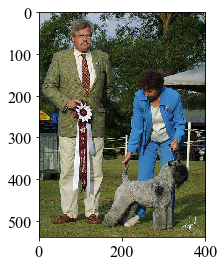

In [8]:
skimage.io.imshow(img_name)

In [9]:
gray = cv2.cvtColor(img, 6) # COLOR_BGR2GRAY

In [21]:
# default params: scale=1.3, nn=5
# https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html
# minSize and maxSize are not specified
scaleFactor = 1.2 # should be > 1
minNeighbors = 1
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)

In [22]:
real_faces = []
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=1)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    # save the faces that contain at least 1 eye
    if len(eyes) > 1:
        real_faces.append([x,y,w,h])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


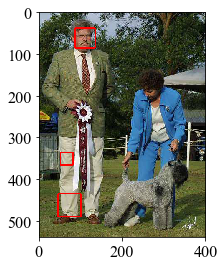

In [23]:
# cv2.imshow('img',img)
skimage.io.imshow(img)

In [13]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Remove faces from img

In [55]:
# some img mutation functions

def replace(v1,v2):
    return v2

def add(v1,v2):
    # mean of r,g,b
    return np.mean([v1,v2] ,axis=0)
    # return v1 + np.minimum(v1, v2) / 2

def overlay(v1,v2):
    # add smallest element values
    intermediate = np.minimum(v1, v2)
    return v1 + intermediate # np.minimum(v1,v2)

def random_img(dims=(10,10,3)):
    img = np.random.randint(0,255,size=dims,dtype=np.uint8)
    return img

def convert_coordinates(x,y,shape):
    w,h = shape[0:2]
    y = h - y
    return x,y

In [66]:
# for every img
f = replace
real_faces = faces
for (x,y,w,h) in real_faces:
    x,y = convert_coordinates(x,y,img.shape)
    print(x,y,w,h)
    dims = (w,h,3) # rgb = 3
    box = random_img(dims)
    print('shape', box.shape)
    w = 10
    h = 10
    # img = add_random(img,replace,dims)
    xs = np.arange(x, x + w)
    ys = np.arange(y, y + h)
    print(xs)
    for i,x1 in enumerate(xs): 
        for j,y1 in enumerate(ys):
            img[x1,y1] = f(img[x1,y1],box[i,j])

86 362 48 48
shape (48, 48, 3)
[86 87 88 89 90 91 92 93 94 95]
51 64 30 30
shape (30, 30, 3)
[51 52 53 54 55 56 57 58 59 60]
45 -35 55 55
shape (55, 55, 3)
[45 46 47 48 49 50 51 52 53 54]


In [64]:
np.arange(10,15)

array([10, 11, 12, 13, 14])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


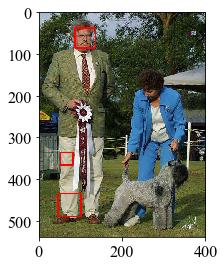

In [65]:
skimage.io.imshow(img)